## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

## Reading the Dataset

In [2]:
# Reading X_train dataset
data1 = pd.read_csv(r'X_train.csv', header='infer')

In [3]:
# Reading the y_train dataset
data2 = pd.read_csv(r'y_train.csv', header='infer')

In [4]:
# Merging the datasets
data = data1.merge(data2, on=['playerId'], how='inner')
print(data.head())

   playerId           Name Sex Equipment   Age  BodyweightKg  BestSquatKg  \
0   19391.0   Carlos Ceron   M       Raw  23.0         87.30        205.0   
1   15978.0   Tito Herrera   M     Wraps  23.0         73.48        220.0   
2   27209.0    Levi Lehman   M       Raw  26.0        112.40        142.5   
3   27496.0  Stacy Hayford   F       Raw  35.0         59.42         95.0   
4   20293.0  Brittany Hirt   F       Raw  26.5         61.40        105.0   

   BestDeadliftKg  BestBenchKg  
0           235.0        125.0  
1           260.0        157.5  
2           220.0        145.0  
3           102.5         60.0  
4           127.5         60.0  


In [5]:
data.describe()

,playerId,Age,BodyweightKg,BestSquatKg,BestDeadliftKg,BestBenchKg
count,18900.00000,18725.00000,18900.000000,18900.000000,18900.00000,18900.000000
mean,15039.49963,29.66470,85.425557,177.601779,201.12277,116.963389
std,8674.67268,11.55708,22.959720,73.142699,62.17163,51.231651
min,0.00000,7.00000,26.130000,-330.000000,18.10000,9.100000
25%,7462.75000,21.50000,67.700000,122.500000,149.85750,72.500000
50%,15122.50000,26.50000,82.100000,175.000000,204.12000,115.000000
75%,22540.25000,35.00000,98.970000,222.500000,247.50000,150.000000
max,29998.00000,83.00000,201.000000,500.000000,408.23000,425.000000


## Handling Null Values

In [6]:
data.isnull().sum()

playerId            0
Name                0
Sex                 0
Equipment           0
Age               175
BodyweightKg        0
BestSquatKg         0
BestDeadliftKg      0
BestBenchKg         0
dtype: int64

We can see that the Age column has 175 missing values. We will fill in those missing values,
but to determine how to fill in the column, we need to know the data type of that column.
To check the data type of the attributes. .info() function is used.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18900 entries, 0 to 18899
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   playerId        18900 non-null  float64
 1   Name            18900 non-null  object 
 2   Sex             18900 non-null  object 
 3   Equipment       18900 non-null  object 
 4   Age             18725 non-null  float64
 5   BodyweightKg    18900 non-null  float64
 6   BestSquatKg     18900 non-null  float64
 7   BestDeadliftKg  18900 non-null  float64
 8   BestBenchKg     18900 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.3+ MB


In [8]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [9]:
data['BestSquatKg'] = data['BestSquatKg'].astype(float)

In [10]:
data.isnull().sum()

playerId          0
Name              0
Sex               0
Equipment         0
Age               0
BodyweightKg      0
BestSquatKg       0
BestDeadliftKg    0
BestBenchKg       0
dtype: int64

## Label Encoding for Sex and Equipment

In [11]:
# converting the sec column object type to float type
data['Sex'] = data['Sex'].map({"M":1, "F":0})
#encode the equipment column
from sklearn.preprocessing import LabelEncoder
data["Equipment"] = LabelEncoder().fit_transform(data['Equipment'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18900 entries, 0 to 18899
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   playerId        18900 non-null  float64
 1   Name            18900 non-null  object 
 2   Sex             18900 non-null  int64  
 3   Equipment       18900 non-null  int32  
 4   Age             18900 non-null  float64
 5   BodyweightKg    18900 non-null  float64
 6   BestSquatKg     18900 non-null  float64
 7   BestDeadliftKg  18900 non-null  float64
 8   BestBenchKg     18900 non-null  float64
dtypes: float64(6), int32(1), int64(1), object(1)
memory usage: 1.2+ MB


In [13]:
data.describe()

,playerId,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestDeadliftKg,BestBenchKg
count,18900.00000,18900.000000,18900.000000,18900.000000,18900.000000,18900.000000,18900.00000,18900.000000
mean,15039.49963,0.675714,1.524127,29.664700,85.425557,177.601779,201.12277,116.963389
std,8674.67268,0.468120,0.839712,11.503448,22.959720,73.142699,62.17163,51.231651
min,0.00000,0.000000,0.000000,7.000000,26.130000,-330.000000,18.10000,9.100000
25%,7462.75000,0.000000,1.000000,21.500000,67.700000,122.500000,149.85750,72.500000
50%,15122.50000,1.000000,1.000000,26.500000,82.100000,175.000000,204.12000,115.000000
75%,22540.25000,1.000000,2.000000,34.500000,98.970000,222.500000,247.50000,150.000000
max,29998.00000,1.000000,3.000000,83.000000,201.000000,500.000000,408.23000,425.000000


In [14]:
data.shape

(18900, 9)

## Exploratory Data Analysis

In [15]:
#Dropping Name column as it is irrelevant
data=data.drop('Name', axis=1)

In [16]:
#Correlation
cor = data.corr()
cor

,playerId,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestDeadliftKg,BestBenchKg
playerId,1.000000,0.001251,0.010193,0.006190,0.005322,0.011154,0.007222,0.002759
Sex,0.001251,1.000000,0.060221,-0.038825,0.487996,0.584848,0.711668,0.685652
Equipment,0.010193,0.060221,1.000000,0.042759,0.109411,0.163007,0.126675,0.134533
Age,0.006190,-0.038825,0.042759,1.000000,0.110192,-0.027382,-0.030556,0.036950
BodyweightKg,0.005322,0.487996,0.109411,0.110192,1.000000,0.605735,0.636692,0.658753
BestSquatKg,0.011154,0.584848,0.163007,-0.027382,0.605735,1.000000,0.850959,0.852457
BestDeadliftKg,0.007222,0.711668,0.126675,-0.030556,0.636692,0.850959,1.000000,0.874053
BestBenchKg,0.002759,0.685652,0.134533,0.036950,0.658753,0.852457,0.874053,1.000000


### HeatMap

<Axes: >

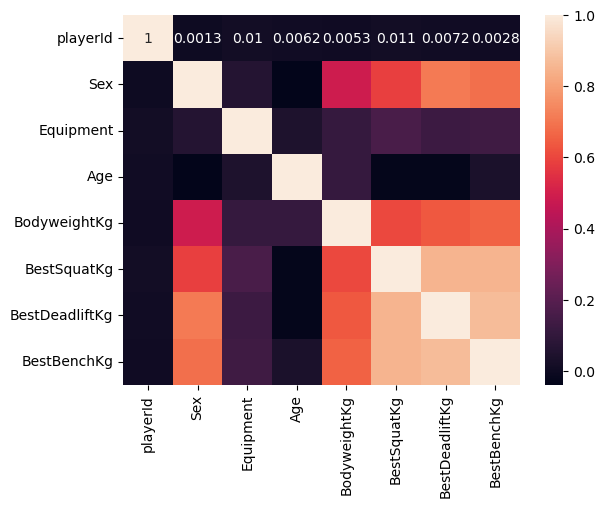

In [17]:
import seaborn as sns
sns.heatmap(cor, annot=True)

c:\tools\miniconda3\envs\Powerlifting\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\tools\miniconda3\envs\Powerlifting\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\tools\miniconda3\envs\Powerlifting\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\tools\miniconda3\envs\Powerlifting\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

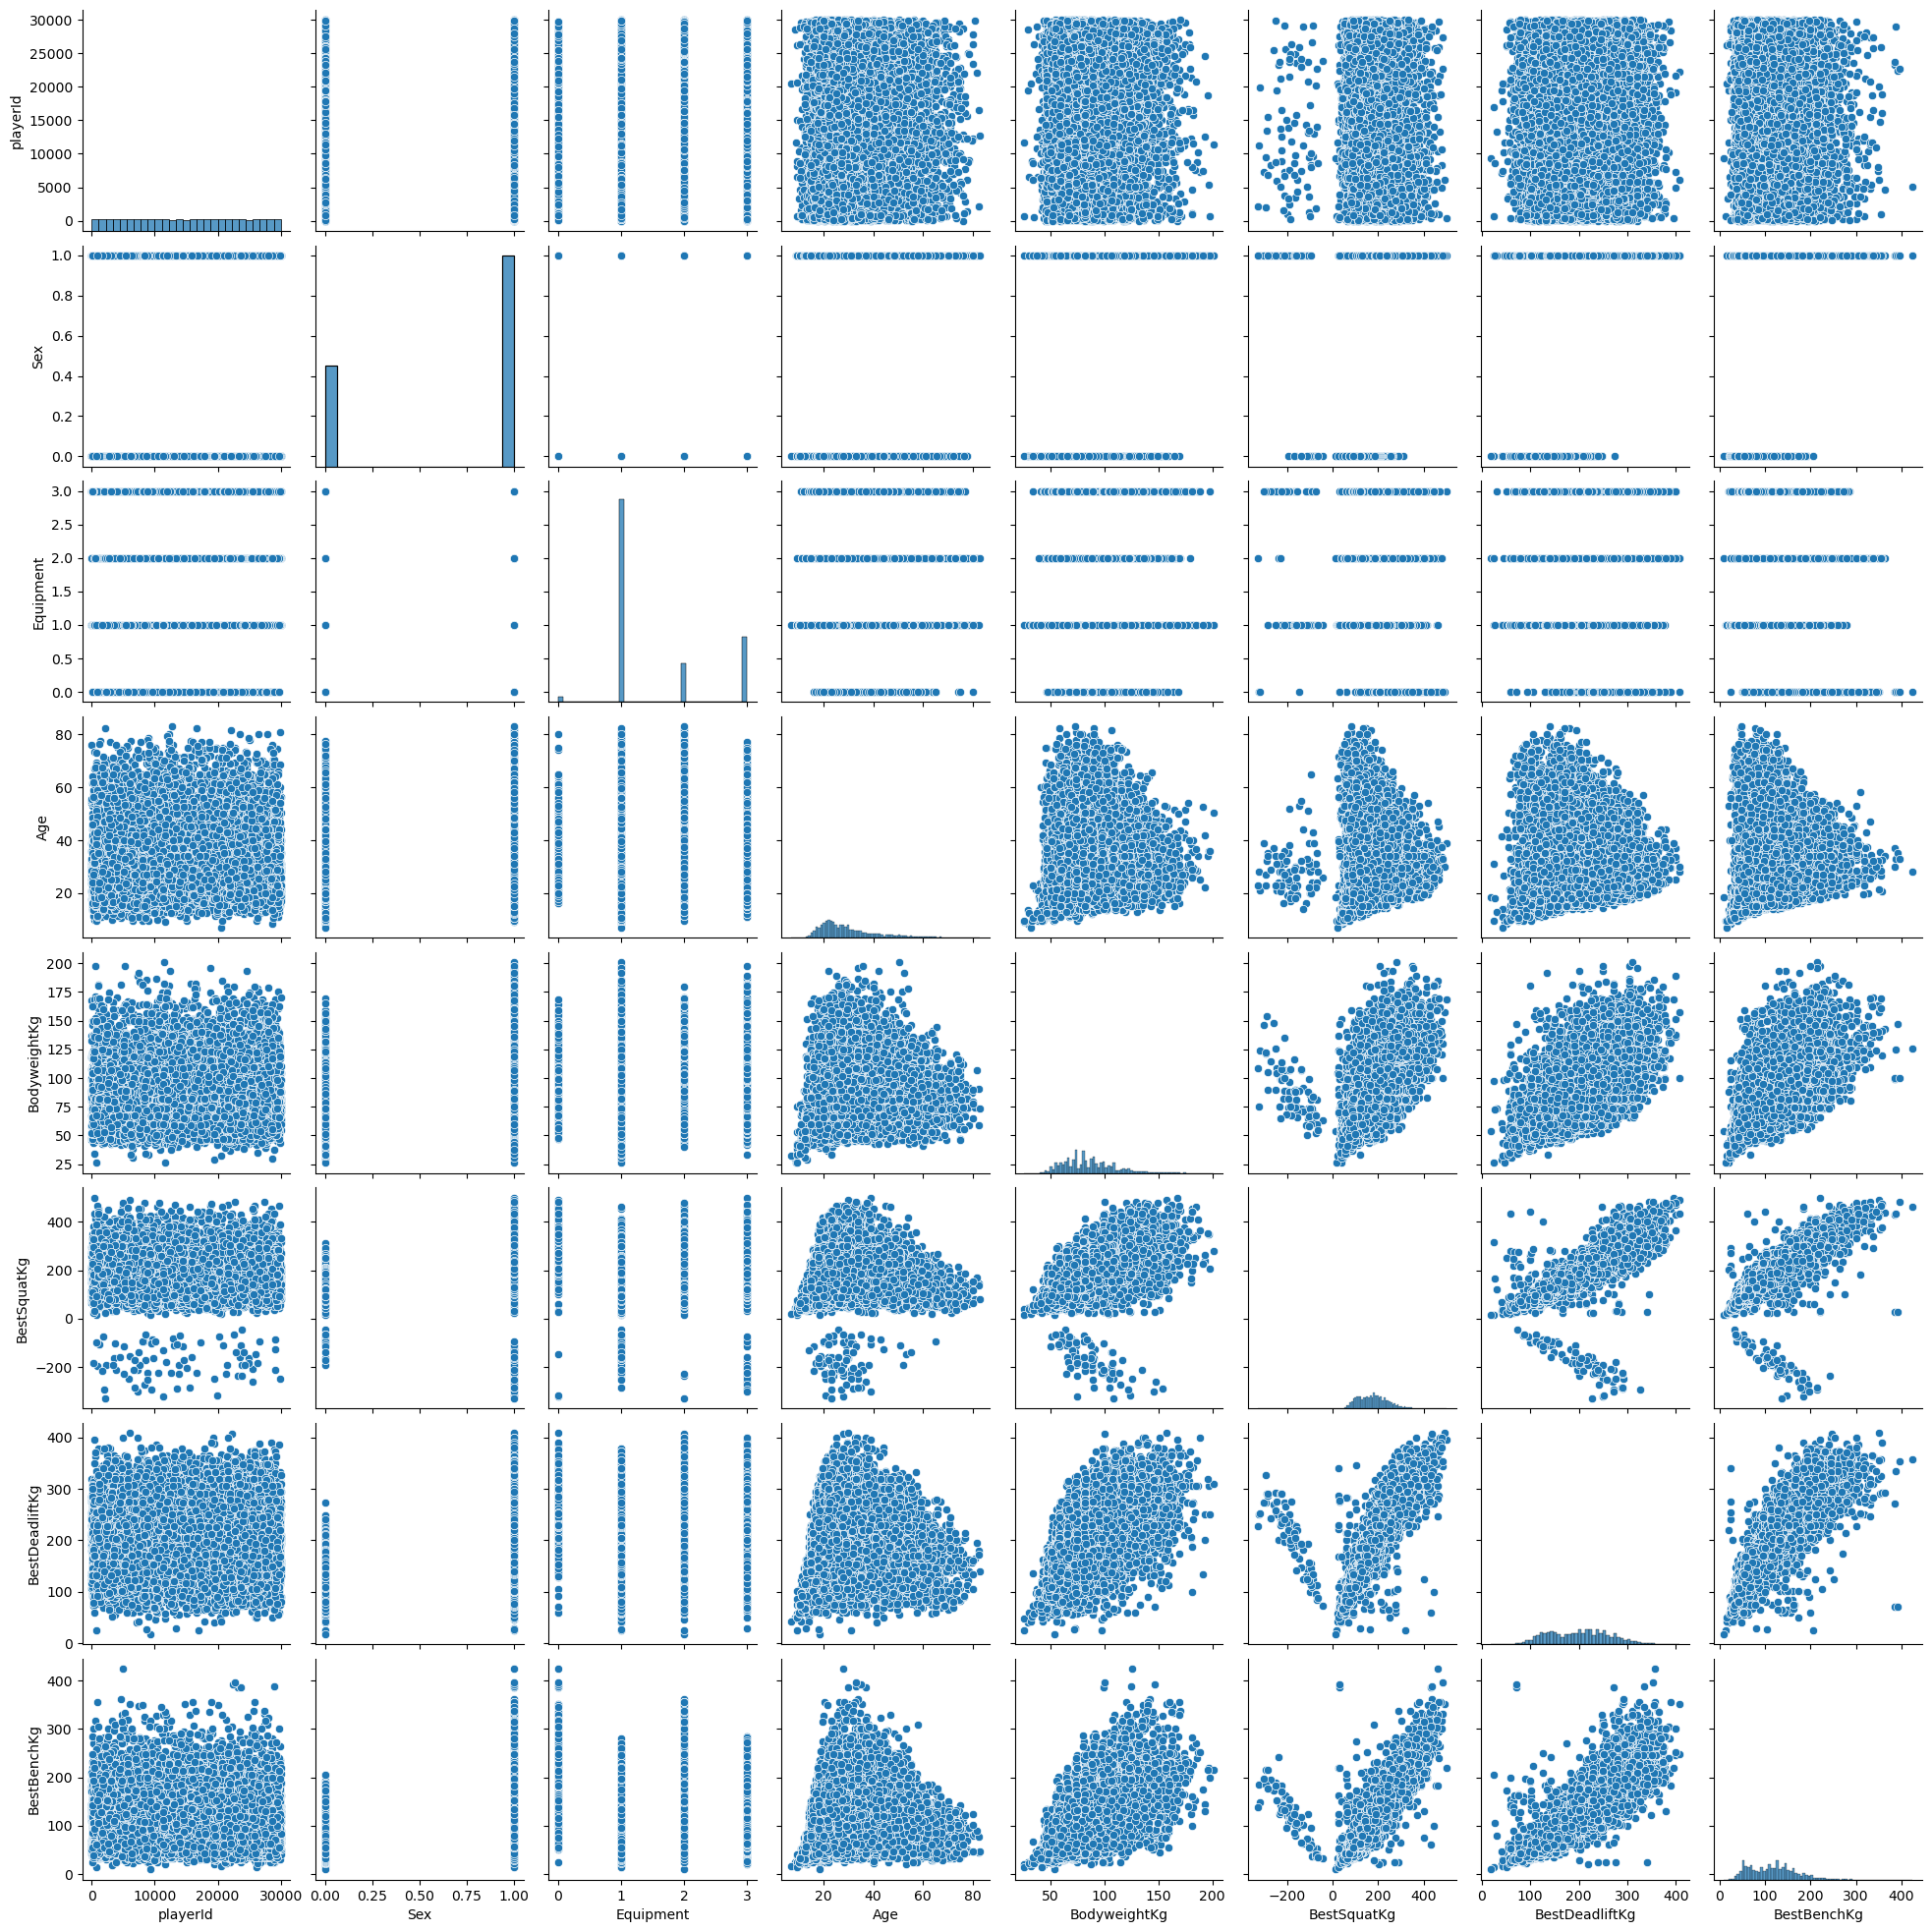

In [18]:
#PairPlot
sns.pairplot(data)

## Train and Testing

In [19]:
y = data['BestDeadliftKg']
x = data.drop(columns = ['BestDeadliftKg'], axis = 1)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [22]:
# Checking the split size
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13230, 7)
(5670, 7)
(13230,)
(5670,)


## Model Building
# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

In [24]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred1 = lr.predict(x_test)

In [26]:
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
print("FOR LINEAR REGRESSION")
print('RMSE: ', rmse)

print("Training Accuracy for Linear Regression: {:.2f}".format(lr.score(x_train, y_train)*100),'%')
print("Testing Accuracy for Linear Regression: {:.2f}".format(lr.score(x_test, y_test)*100),'%')

FOR LINEAR REGRESSION
RMSE:  25.62653634867322
Training Accuracy for Linear Regression: 83.28 %
Testing Accuracy for Linear Regression: 83.06 %


# Random Forest

In [27]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred2 = rf.predict(x_test)

In [28]:
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)

print("Random Forest")
print('RMSE', rmse)
print("Training Accuracy for Random Forest: {:.2f}".format(rf.score(x_train, y_train)*100),'%')
print("Testing Accuracy for Random Forest: {:.2f}".format(rf.score(x_test, y_test)*100),'%')


Random Forest
RMSE 21.61788541119173
Training Accuracy for Random Forest: 98.32 %
Testing Accuracy for Random Forest: 87.94 %


# Decision Tree

In [33]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred3 = dt.predict(x_test)

In [34]:
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)
print("RMSE Value : {:.2f}".format(rmse))
print("Training Accuracy for Random Forest: {:.2f}".format(dt.score(x_train, y_train)*100),'%')
print("Testing Accuracy for Random Forest: {:.2f}".format(dt.score(x_test, y_test)*100),'%')

RMSE Value : 29.28
Training Accuracy for Random Forest: 100.00 %
Testing Accuracy for Random Forest: 77.89 %


# XgBoost

In [38]:
xg_reg = xgb.XGBRegressor(n_estimators= 50, max_depth=2, learning_rate= 0.5)
xg_reg.fit(x_train, y_train)
y_pred4 = xg_reg.predict(x_test)

c:\tools\miniconda3\envs\Powerlifting\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\tools\miniconda3\envs\Powerlifting\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\tools\miniconda3\envs\Powerlifting\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\tools\miniconda3\envs\Powerlifting\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

In [39]:
mse = mean_squared_error(y_test, y_pred4)
rmse = np.sqrt(mse)
print("RMSE Value: ", rmse)
print("Training Accuracy for XgBoost Model: {:.2f}".format(xg_reg.score(x_train, y_train)*100),'%')
print("Testing Accuracy for XgBoost Model: {:.2f}".format(xg_reg.score(x_test, y_test)*100),'%')

RMSE Value:  21.225938542330493
Training Accuracy for XgBoost Model: 89.19 %
Testing Accuracy for XgBoost Model: 88.38 %


c:\tools\miniconda3\envs\Powerlifting\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\tools\miniconda3\envs\Powerlifting\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\tools\miniconda3\envs\Powerlifting\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\tools\miniconda3\envs\Powerlifting\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or